In [70]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

#the above imports the plotting library matplotlib

# Loading Images as Python Arrays (Tensors)

In [71]:
ls

archives/
cross_validation.py
Lecture1_intro.ipynb
metrics.py
minimum_distance_classifier.py
optimizer.py
Processing Auditory Data.ipynb
Processing Human Data.ipynb
tito_chabo.pdf
two bears.jpg
Understanding Self Regulation Ontology Data.ipynb
utils.py


In [72]:
#we'll use the Python Image Library to load and manipulate images such as jpgs
from PIL import Image

In [73]:
#let's load the image "two bears.jpg"
bear_image = Image.open('two bears.jpg')

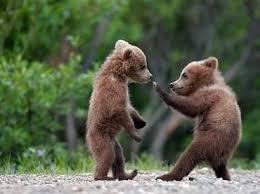

In [74]:
bear_image

In [75]:
#numpy is the numerical python library.  It's the main "tensor" library in python
import numpy as np

In [76]:
#here we can convert the image to an array (aka a "tensor")
bear_array = np.asarray(bear_image)

In [77]:
#what's the dimension of this tensor?
bear_array.ndim

3

In [78]:
#what's the shape of the tensor?
bear_array.shape
#the first two numbers of the shape are the pixel size of the image
#the last number is the fact that there are 3 color channels

(194, 260, 3)

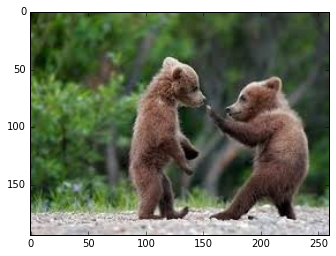

In [11]:
#let's view the array using the matplotlib "imshow" routine
plt.imshow(bear_array)

In [10]:
#but it's really a numerical array under the hood
bear_array

array([[[ 30,  47,  13],
        [ 30,  47,  11],
        [ 35,  53,  15],
        ..., 
        [ 68,  80,  66],
        [ 71,  83,  69],
        [ 74,  86,  72]],

       [[ 30,  47,  13],
        [ 27,  44,   8],
        [ 30,  48,  10],
        ..., 
        [ 65,  77,  63],
        [ 69,  81,  67],
        [ 72,  84,  70]],

       [[ 30,  47,  13],
        [ 23,  40,   4],
        [ 24,  42,   4],
        ..., 
        [ 62,  75,  58],
        [ 65,  78,  61],
        [ 68,  81,  64]],

       ..., 
       [[192, 183, 184],
        [194, 185, 186],
        [198, 189, 190],
        ..., 
        [188, 187, 193],
        [193, 192, 198],
        [193, 192, 198]],

       [[183, 177, 177],
        [174, 168, 168],
        [176, 170, 170],
        ..., 
        [184, 183, 189],
        [198, 197, 203],
        [207, 206, 212]],

       [[177, 171, 171],
        [168, 162, 162],
        [170, 164, 164],
        ..., 
        [184, 183, 189],
        [198, 197, 203],
        [207, 206,

In [12]:
#here's how we index into array to get one element (item in position 22,45)
bear_array[22, 45]

array([51, 93, 43], dtype=uint8)

In [13]:
#here's a 2x2 square of pixels in the upper left corner
bear_array[:2, :2]

array([[[30, 47, 13],
        [30, 47, 11]],

       [[30, 47, 13],
        [27, 44,  8]]], dtype=uint8)

# Ventral Stream Dataset: The Images

In [79]:
"""
To go forward from here you'll have to download the "ventral_neural_data.hdf5" dataset that we
provide to students in this class.  Course staff provide you a download link in class or via Canvas.

Once you've downloaded the file, set the "DATA_PATH" variable below to be the path of 
the file on your computer. 
"""

DATA_PATH = "/home/chengxuz/Class/psych253_2018/data/ventral_neural_data.hdf5"

In [80]:
#import hdf5-handling package, called h5py
import h5py

In [81]:
#open the dataset 
Ventral_Dataset = h5py.File(DATA_PATH)

In [82]:
Ventral_Dataset

<HDF5 file "ventral_neural_data.hdf5" (mode r)>

This data was originally collected for this paper:

Majaj, Najib J., Ha Hong, Ethan A. Solomon, and James J. DiCarlo. "Simple learned weighted sums of inferior temporal neuronal firing rates accurately predict human core object recognition performance." Journal of Neuroscience 35, no. 39 (2015): 13402-13418.

It has subsequently been used in:

Yamins Daniel LK, Ha Hong, Charles F. Cadieu, Ethan A. Solomon, Darren Seibert, and James J. DiCarlo. "Performance-optimized hierarchical models predict neural responses in higher visual cortex." Proceedings of the National Academy of Sciences 111, no. 23 (2014): 8619-8624.

Cadieu, Charles F., Ha Hong, Daniel LK Yamins, Nicolas Pinto, Diego Ardila, Ethan A. Solomon, Najib J. Majaj, and James J. DiCarlo. "Deep neural networks rival the representation of primate IT cortex for core visual object recognition." PLoS computational biology 10, no. 12 (2014): e1003963.

Hong, Ha, Daniel LK Yamins, Najib J. Majaj, and James J. DiCarlo. "Explicit information for category-orthogonal object properties increases along the ventral stream." Nature neuroscience 19, no. 4 (2016): 613.

In [83]:
#by looking at the "keys" attribute you can see what the parts of the dataset are
Ventral_Dataset.keys()

[u'image_meta',
 u'images',
 u'neural_meta',
 u'time_averaged',
 u'time_averaged_trial_averaged',
 u'time_binned',
 u'time_binned_trial_averaged']

In [18]:
#let's have a look at the "images" object
Ventral_Dataset['images']
#ok, so this is a tensor with 3 dimensions

<HDF5 dataset "images": shape (5760, 256, 256), type "|u1">

In [19]:
#what are these dimension?
all_images = Ventral_Dataset['images']
all_images.dims.keys()

[<"image" dimension 0 of HDF5 dataset at 140649472685232>,
 <"height" dimension 1 of HDF5 dataset at 140649472685232>,
 <"width" dimension 2 of HDF5 dataset at 140649472685232>]

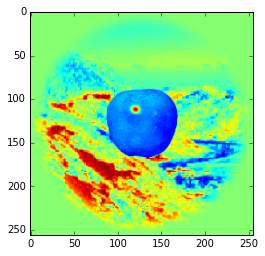

In [20]:
#hm.... why isn't there a 4th dimension for the color channel?
plt.imshow(all_images[0])
#looks weird!

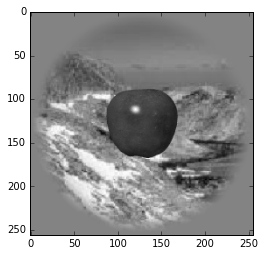

In [21]:
#maybe it's grayscale? 
plt.imshow(all_images[0], cmap='gray')
#aha!  so that's why there were only 3 dimensions in the tensor -- these are grayscale images

In [22]:
#what else is there? well, there was an "image_meta" object.  let's look at that.
Ventral_Dataset['image_meta']
#it's got some hierarchical structure under it.  

<HDF5 group "/image_meta" (9 members)>

In [23]:
#what are the objects hierarchical under image_meta?
Ventral_Dataset['image_meta'].keys()
#these look like meta fields for the images.  

[u'category',
 u'object_name',
 u'rotation_xy',
 u'rotation_xz',
 u'rotation_yz',
 u'size',
 u'translation_y',
 u'translation_z',
 u'variation_level']

In [24]:
#let's have a look at the "category" object
Ventral_Dataset['image_meta']['category']
#ok this is an array of the same length as the number of images (5760), but it's values are string-type (S7)

<HDF5 dataset "category": shape (5760,), type "|S7">

In [34]:
#what are the values?
Ventral_Dataset['image_meta']['category'][:10]
#ok they look like real English-language category names

array(['Fruits', 'Fruits', 'Fruits', 'Fruits', 'Fruits', 'Fruits',
       'Fruits', 'Fruits', 'Fruits', 'Fruits'],
      dtype='|S7')

In [25]:
#what are the unique values in the category field?  Let's use the "unique" function from the numpy library
np.unique(Ventral_Dataset['image_meta']['category'])
#ok, there are eight categories of obejcts in this dataset

array(['Animals', 'Boats', 'Cars', 'Chairs', 'Faces', 'Fruits', 'Planes',
       'Tables'],
      dtype='|S7')

In [54]:
#what are the unique values in the object_name field?  
print(np.unique(Ventral_Dataset['image_meta']['object_name']))
#ok, quite a few. 

['Apple_Fruit_obj' 'Apricot_obj' 'BAHRAIN' 'Beetle' 'CGTG_L' 'DTUG_L'
 'ELEPHANT_M' 'GORILLA' 'LIONESS' 'MQUEEN_L' 'Peach_obj' 'Pear_obj'
 'SISTER_L' 'Strawberry_obj' 'TURTLE_L' '_001' '_004' '_008' '_010' '_011'
 '_014' '_01_Airliner_2jetEngines' '_031' '_033' '_05_future' '_08' '_10'
 '_11' '_12' '_18' '_19_flyingBoat' '_37' '_38' '_44' 'alfa155' 'astra'
 'bear' 'blCow' 'bmw325' 'bora_a' 'breed_pug' 'celica' 'clio' 'cruiser'
 'f16' 'face0001' 'face0002' 'face0003' 'face0004' 'face0005' 'face0006'
 'face0007' 'face0008' 'hedgehog' 'junkers88' 'mig29' 'motoryacht'
 'raspberry_obj' 'rdbarren' 'sopwith' 'support' 'walnut_obj'
 'watermelon_obj' 'z3']


In [26]:
#let's print out a programmatically-constructed sentence telling us how many objects there are
unique_objects = np.unique(Ventral_Dataset['image_meta']['object_name'])
number_unique_objects = len(unique_objects)
print('There are %d unique objects' % number_unique_objects)

There are 64 unique objects


In [27]:
#What's the relationship beween the categories and the objects?
categories = Ventral_Dataset['image_meta']['category'][:]   #array of category labels for all images  --> shape == (5760,)
unique_categories = np.unique(categories)                #array of unique category labels --> shape == (8,)
objects = Ventral_Dataset['image_meta']['object_name'][:]   #array of object labels for all images --> shape == (5670,)
unique_objects = np.unique(objects)                      #array of unique object labels --> shape == (64,) 

#now let's use what we just defined to create a dictionary whose keys are categories and whose values
#are arays of unique objects in each category
objects_by_category = {c: np.unique(objects[categories == c]) 
                       for c in unique_categories}

In [28]:
#see, the keys of this dictionary are the different categories
objects_by_category.keys()

['Tables', 'Animals', 'Chairs', 'Cars', 'Faces', 'Planes', 'Fruits', 'Boats']

In [73]:
#and the value of the "Animals" key is an array containing some animal names
objects_by_category['Animals']

array(['ELEPHANT_M', 'GORILLA', 'LIONESS', 'TURTLE_L', 'bear', 'blCow',
       'breed_pug', 'hedgehog'],
      dtype='|S24')

In [29]:
objects_by_category['Chairs']

array(['_001', '_004', '_008', '_010', '_011', '_014', '_031', '_033'],
      dtype='|S24')

In [30]:
objects_by_category['Faces']

array(['face0001', 'face0002', 'face0003', 'face0004', 'face0005',
       'face0006', 'face0007', 'face0008'],
      dtype='|S24')

In [75]:
#how many of each type of category are there? 
{c: len(objects_by_category[c]) for c in unique_categories}
#ok, so there are 8 objects of each category, for each of 8 categories (making up the 64 objects)

{'Animals': 8,
 'Boats': 8,
 'Cars': 8,
 'Chairs': 8,
 'Faces': 8,
 'Fruits': 8,
 'Planes': 8,
 'Tables': 8}

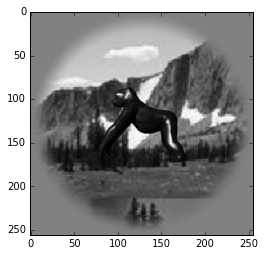

In [31]:
#let's look at an image of one of the animals
first_gorilla_index = (objects == 'GORILLA').nonzero()[0][0]
first_gorilla_image = all_images[first_gorilla_index]
plt.imshow(first_gorilla_image, cmap='gray')

In [32]:
plt.plot?

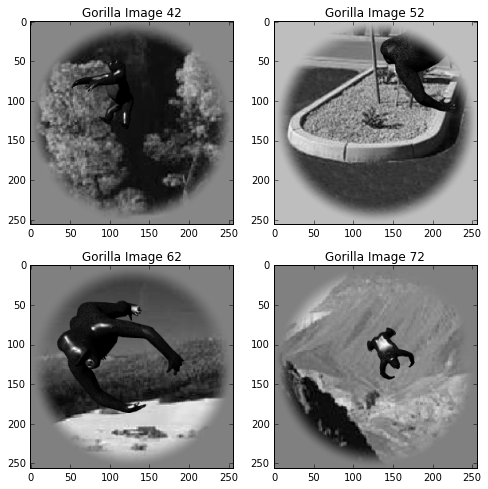

In [35]:
#let's look at some more images
gorilla_indices = (objects == 'GORILLA').nonzero()[0]
random_choices = [41, 51, 61, 71]
various_gorilla_images = [all_images[gorilla_indices[ind]] for ind in random_choices]
plt.figure(figsize=(8, 8))
for j in range(4):
    plt.subplot(2, 2, j+1)
    plt.imshow(various_gorilla_images[j], cmap='gray')
    plt.title('Gorilla Image %d' % (random_choices[j]+1))
#ok so it looks like we're looking at the same gorilla object from many different angles and magnifications
#on all sorts of different randomly chosen backgrounds

In [36]:
#let's look at a different field in the image meta for a moment
sizes = Ventral_Dataset['image_meta']['size']
sizes

<HDF5 dataset "size": shape (5760,), type "<f8">

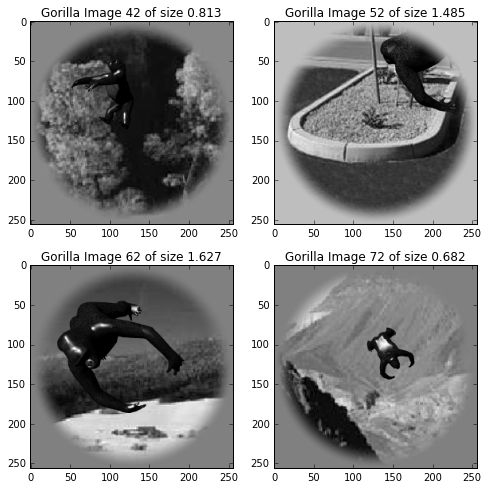

In [37]:
#let's visualize the size next to the gorilla images
gorilla_indices = (objects == 'GORILLA').nonzero()[0]
random_choices = [41, 51, 61, 71]
various_gorilla_images = [all_images[gorilla_indices[ind]] for ind in random_choices]
plt.figure(figsize=(8, 8))
for j in range(4):
    plt.subplot(2, 2, j+1)
    plt.imshow(various_gorilla_images[j], cmap='gray')
    plt.title('Gorilla Image %d of size %.3f' % (random_choices[j]+1, 
                                                 sizes[gorilla_indices[random_choices[j]]]))
#right -- so the size corresponds to the magnification of the objects in the image

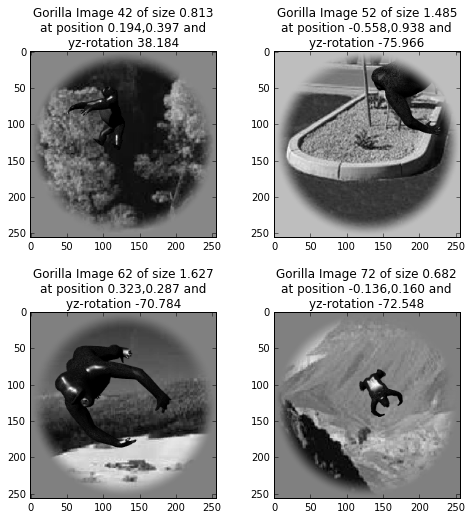

In [38]:
#let's visualize a bunch of oter metadata properties

ty = Ventral_Dataset['image_meta']['translation_y']
tz = Ventral_Dataset['image_meta']['translation_z']
rotyz = Ventral_Dataset['image_meta']['rotation_yz']

gorilla_indices = (objects == 'GORILLA').nonzero()[0]
random_choices = [41, 51, 61, 71]
various_gorilla_images = [all_images[gorilla_indices[ind]] for ind in random_choices]
plt.figure(figsize=(8, 8))
for j in range(4):
    plt.subplot(2, 2, j+1)
    plt.imshow(various_gorilla_images[j], cmap='gray')
    plt.title('Gorilla Image %d of size %.3f\nat position %.3f,%.3f and\nyz-rotation %.3f' % 
                                                (random_choices[j]+1, 
                                                 sizes[gorilla_indices[random_choices[j]]],
                                                 ty[gorilla_indices[random_choices[j]]],
                                                 tz[gorilla_indices[random_choices[j]]],
                                                 rotyz[gorilla_indices[random_choices[j]]]))
plt.subplots_adjust(hspace=0.4)

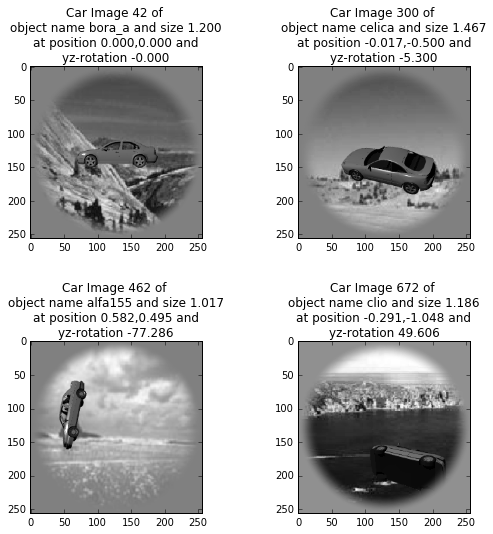

In [137]:
#let's visualize a bunch of oter metadata properties

ty = Ventral_Dataset['image_meta']['translation_y']
tz = Ventral_Dataset['image_meta']['translation_z']
rotyz = Ventral_Dataset['image_meta']['rotation_yz']

car_indices = (categories == 'Cars').nonzero()[0]
random_choices = [41, 299, 461, 671]
various_car_images = [all_images[car_indices[ind]] for ind in random_choices]
plt.figure(figsize=(8, 8))
for j in range(4):
    plt.subplot(2, 2, j+1)
    plt.imshow(various_car_images[j], cmap='gray')
    plt.title('Car Image %d of \nobject name %s and size %.3f\nat position %.3f,%.3f and\nyz-rotation %.3f' % 
                                                (random_choices[j]+1, 
                                                 objects[car_indices[random_choices[j]]],
                                                 sizes[car_indices[random_choices[j]]],
                                                 ty[car_indices[random_choices[j]]],
                                                 tz[car_indices[random_choices[j]]],
                                                 rotyz[car_indices[random_choices[j]]]))
plt.subplots_adjust(hspace=0.6, wspace=.5)

In [138]:
#look at that last key -- "variation_level"
Ventral_Dataset['image_meta'].keys()

[u'category',
 u'object_name',
 u'rotation_xy',
 u'rotation_xz',
 u'rotation_yz',
 u'size',
 u'translation_y',
 u'translation_z',
 u'variation_level']

In [39]:
#we can see that there are three unique values in the variation_level field:
var_level = Ventral_Dataset['image_meta']['variation_level'][:]
np.unique(var_level)

array(['V0', 'V3', 'V6'],
      dtype='|S2')

In [40]:
#hat are the y positions of the objects with variation level V0?
ypos_at_v0 = ty[var_level == 'V0']
print(ypos_at_v0[:20])
print('V0 ty min --> %.2f' % ypos_at_v0.min())
print('V0 ty max --> %.2f' % ypos_at_v0.max())
#they're all 0

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
V0 ty min --> 0.00
V0 ty max --> 0.00


In [41]:
#and the higher variation levels have more ... well, variation 
ypos_at_v3 = ty[var_level == 'V3']
print('V3 ty min --> %.2f' % ypos_at_v3.min())
print('V3 ty max --> %.2f' % ypos_at_v3.max())

ypos_at_v6 = ty[var_level == 'V6']
print('V6 ty min --> %.2f' % ypos_at_v6.min())
print('V6 ty max --> %.2f'% ypos_at_v6.max())

V3 ty min --> -0.30
V3 ty max --> 0.30
V6 ty min --> -0.60
V6 ty max --> 0.60


In [42]:
#how many images of each variation level were collected? 
num_v0_images = (var_level == 'V0').sum()
num_v3_images = (var_level == 'V3').sum()
num_v6_images = (var_level == 'V6').sum()
print('number of var 0 images: %d' % num_v0_images)
print('number of var 3 images: %d' % num_v3_images)
print('number of var 6 images: %d' % num_v6_images)


number of var 0 images: 640
number of var 3 images: 2560
number of var 6 images: 2560


In [43]:
#how does this break down by object? 
image_counts_by_object_and_varlevel = {(o, v): ((var_level == v) & (objects == o)).sum() 
                                       for o in unique_objects 
                                       for v in ['V0', 'V3', 'V6']}


three_random_objects = unique_objects[[0, 10, 20]]

for v in ['V0', 'V3', 'V6']:
    for o in three_random_objects:
        print('%d images of %s of var level %s' % (image_counts_by_object_and_varlevel[(o, v)], o, v))
        
#apparently there are 10 images of each object at var level V0, and 40 images each for var levels V3 and V6
#so given that there 8 objects per category, that means there should be 80 var 0 images per category, 
#and 320 var 3/6 images per category

10 images of Apple_Fruit_obj of var level V0
10 images of Peach_obj of var level V0
10 images of _014 of var level V0
40 images of Apple_Fruit_obj of var level V3
40 images of Peach_obj of var level V3
40 images of _014 of var level V3
40 images of Apple_Fruit_obj of var level V6
40 images of Peach_obj of var level V6
40 images of _014 of var level V6


In [44]:
#let's check the prediction made above 
image_counts_by_category_and_varlevel = {(c, v): ((var_level == v) & (categories == c)).sum() 
                                         for c in unique_categories
                                         for v in ['V0', 'V3', 'V6']}


three_random_categories = unique_categories[[0, 3, 7]]

for v in ['V0', 'V3', 'V6']:
    for c in three_random_categories:
        print('%d images of %s of var level %s' % (image_counts_by_category_and_varlevel[(c, v)], c, v))
    
#yep!

80 images of Animals of var level V0
80 images of Chairs of var level V0
80 images of Tables of var level V0
320 images of Animals of var level V3
320 images of Chairs of var level V3
320 images of Tables of var level V3
320 images of Animals of var level V6
320 images of Chairs of var level V6
320 images of Tables of var level V6


# Ventral Stream Dataset: The Neural Data Itself

In [160]:
#let's look at some of the other objects in the dataset
Ventral_Dataset['time_averaged_trial_averaged']

<HDF5 dataset "time_averaged_trial_averaged": shape (5760, 296), type "<f4">

In [161]:
#ok this key has two dimensions, with suggestive names
Ventral_Dataset['time_averaged_trial_averaged'].dims.keys()

[<"image" dimension 0 of HDF5 dataset at 139964685852832>,
 <"neuron" dimension 1 of HDF5 dataset at 139964685852832>]

In [47]:
#response of the first 5 neurons to the first stimulus (that floating apple from above)
Neural_Data = Ventral_Dataset['time_averaged_trial_averaged']
Neural_Data[0][:5]

array([-0.08108135, -0.2099618 ,  0.11562751, -0.43792772,  0.10511396], dtype=float32)

In [167]:
#what types of metadata about the neurons are there? 
Ventral_Dataset['neural_meta'].keys()

[u'AIT_NEURONS',
 u'ANIMAL_INFO',
 u'ARRAY_INFO',
 u'CIT_NEURONS',
 u'IT_NEURONS',
 u'PIT_NEURONS',
 u'V4_NEURONS']

In [45]:
#these are indices into the neurons dimension, defining different subsets of neurons
#in different brain areas
V4_NEURONS = Ventral_Dataset['neural_meta']['V4_NEURONS'][:]
print(V4_NEURONS)
print('\nThere are %d V4 neurons' % len(V4_NEURONS))

IT_NEURONS = Ventral_Dataset['neural_meta']['IT_NEURONS'][:]
print(IT_NEURONS)
print('\n There are %d IT neurons' % len(IT_NEURONS))

[ 11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28
  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 163 164
 165 166 167 168 169 170 211 212 213 214 215 216 217 218 219 220 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295]

There are 128 V4 neurons
[  0   1   2   3   4   5   6   7   8   9  10  45  46  47  48  49  50  51
  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 18

In [48]:
#we can create subsets of the neural data corresponding to different columns -- e.g. different groups of neurons
V4_Neural_Data = Neural_Data[:, V4_NEURONS]
print('V4 neural data shape is %d images X %d V4 neurons' % V4_Neural_Data.shape)

IT_Neural_Data = Neural_Data[:, IT_NEURONS]
print('IT neural data shape is %d images X %d IT neurons' % IT_Neural_Data.shape)


V4 neural data shape is 5760 images X 128 V4 neurons
IT neural data shape is 5760 images X 168 IT neurons


In [49]:
#digging a little deeper, there are data at finer levels of resolution -- split by level of variation
Ventral_Dataset['time_averaged'].keys()

[u'variation_level_0', u'variation_level_3', u'variation_level_6']

In [50]:
#the dimensions of this dataset are no longer trial averaged -- now we see dimensions
#of trials X images X nerons
Ventral_Dataset['time_averaged']['variation_level_0'].dims.keys()

[<"trial" dimension 0 of HDF5 dataset at 140648706944688>,
 <"image" dimension 1 of HDF5 dataset at 140648706944688>,
 <"neuron" dimension 2 of HDF5 dataset at 140648706944688>]

In [289]:
#we can see that 28 repeats each of the 640 variation level 0 images were collected
Ventral_Dataset['time_averaged']['variation_level_0']

<HDF5 dataset "variation_level_0": shape (28, 640, 296), type "<f4">

In [51]:
#complicating things a little are that the repeats are different for different variation levels
#apparently, the variation levels were collected separately and more repeats were collected for each of 2560
#medium and high variation level images (51 and 47 respectively) than for the low variation subset of images
print(Ventral_Dataset['time_averaged']['variation_level_3'])
print(Ventral_Dataset['time_averaged']['variation_level_6'])

<HDF5 dataset "variation_level_3": shape (51, 2560, 296), type "<f4">
<HDF5 dataset "variation_level_6": shape (47, 2560, 296), type "<f4">


In [52]:
#there's even one level more detailed:
Ventral_Dataset['time_binned'].keys()
#there's data for each 20ms timebin

[u'0ms',
 u'100ms',
 u'120ms',
 u'140ms',
 u'160ms',
 u'180ms',
 u'200ms',
 u'20ms',
 u'40ms',
 u'60ms',
 u'80ms']

In [319]:
#again, broken down by variation level
Ventral_Dataset['time_binned']['40ms'].keys()

[u'variation_level_0', u'variation_level_3', u'variation_level_6']

In [323]:
#again, in the form of trials X images X neurons
print(Ventral_Dataset['time_binned']['40ms']['variation_level_0'])
Ventral_Dataset['time_binned']['40ms']['variation_level_0'].dims.keys()

<HDF5 dataset "variation_level_0": shape (29, 640, 296), type "<f4">


[<"trial" dimension 0 of HDF5 dataset at 139964618082896>,
 <"image" dimension 1 of HDF5 dataset at 139964618082896>,
 <"neuron" dimension 2 of HDF5 dataset at 139964618082896>]

In [325]:
#this data is aggregated into a trial-averaged form
Ventral_Dataset['time_binned_trial_averaged']

<HDF5 dataset "time_binned_trial_averaged": shape (5760, 11, 296), type "<f4">

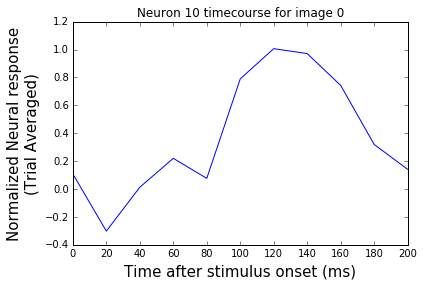

In [53]:
#here's the timecourse the trial-averaged response of 11th neuron to the first image
neuron_index = 10
image_index = 0
plt.plot(Ventral_Dataset['time_binned_trial_averaged'][image_index, :, neuron_index])
plt.xlabel('Time after stimulus onset (ms)', fontsize=15)
plt.xticks(np.arange(11), np.arange(11) * 20)
plt.ylabel('Normalized Neural response\n(Trial Averaged)', fontsize=15)
plt.title('Neuron %d timecourse for image %d' % (neuron_index, image_index))

# Ventral Stream Dataset: Looking at the Data a Little

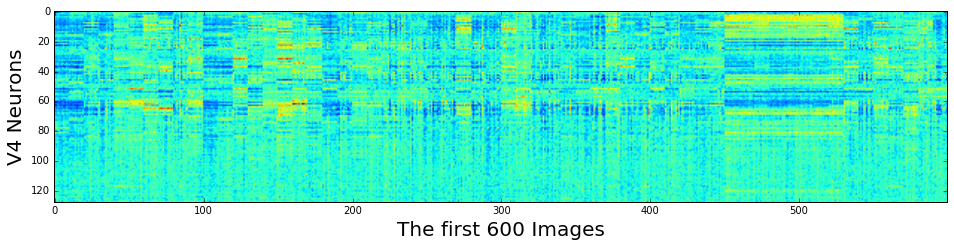

In [54]:
N_images = 600
plt.figure(figsize=(16,5))
plt.imshow(V4_Neural_Data[:N_images].T)
plt.xlabel('The first %d Images' % N_images, fontsize=20)
plt.ylabel('V4 Neurons', fontsize=20)

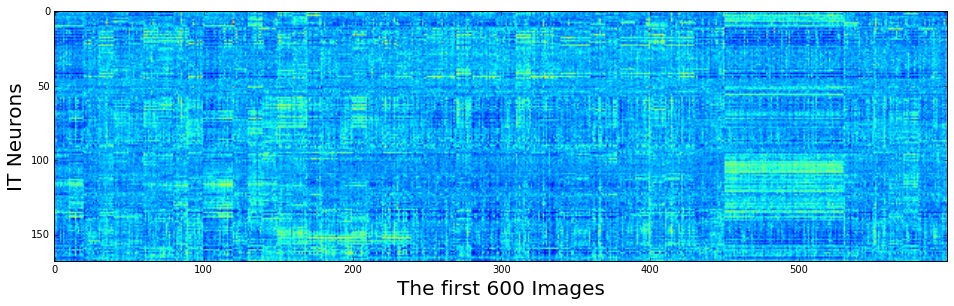

In [55]:
N_images = 600
plt.figure(figsize=(16,5))
plt.imshow(IT_Neural_Data[:N_images].T)
plt.xlabel('The first %d Images' % N_images, fontsize=20)
plt.ylabel('IT Neurons', fontsize=20)

In [56]:
V4_Gorilla_Data = V4_Neural_Data[objects == 'GORILLA']
V4_Gorilla_Data.shape

(90, 128)

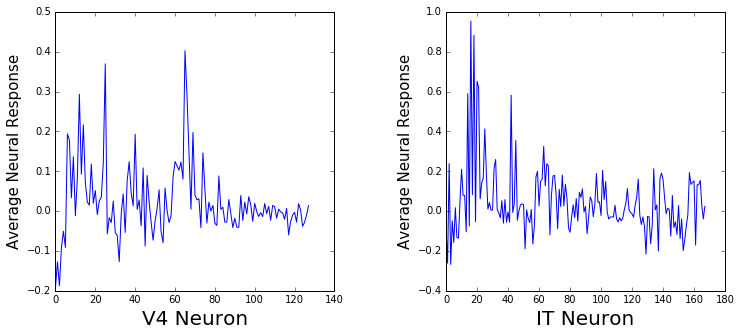

In [57]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
V4_Gorilla_Pattern = V4_Gorilla_Data.mean(0)
plt.plot(V4_Gorilla_Pattern)
plt.xlabel('V4 Neuron', fontsize=20)
plt.ylabel('Average Neural Response', fontsize=15)

plt.subplot(1, 2, 2)
IT_Gorilla_Data = IT_Neural_Data[objects == 'GORILLA']
IT_Gorilla_Pattern = IT_Gorilla_Data.mean(0)
plt.plot(IT_Gorilla_Pattern)
plt.xlabel('IT Neuron', fontsize=20)
plt.ylabel('Average Neural Response', fontsize=15)
plt.subplots_adjust(wspace=0.4)

In [58]:
V4_object_means_by_cat_obj = np.array([[V4_Neural_Data[objects == o].mean(0) for o in objects_by_category[c]]
                                                                for c in unique_categories])

V4_object_means_by_cat_obj.shape

(8, 8, 128)

In [59]:
V4_object_means_by_category = np.row_stack([[V4_Neural_Data[objects == o].mean(0) for o in objects_by_category[c]]
                                                                for c in unique_categories])
V4_object_means_by_category.shape

(64, 128)

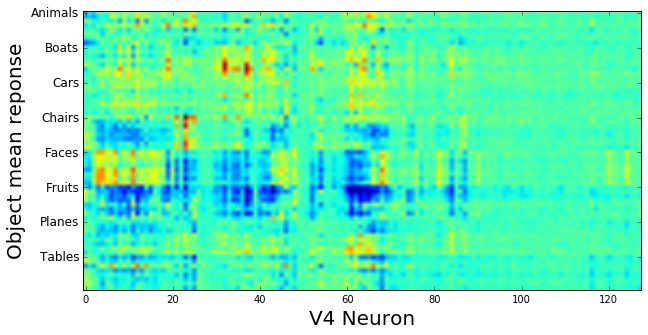

In [60]:
plt.figure(figsize=(12, 5))
plt.imshow(V4_object_means_by_category)
plt.xlabel('V4 Neuron', fontsize=20)
plt.ylabel('Object mean reponse', fontsize=20)
plt.yticks(np.arange(0, 64, 8), unique_categories, fontsize=12);

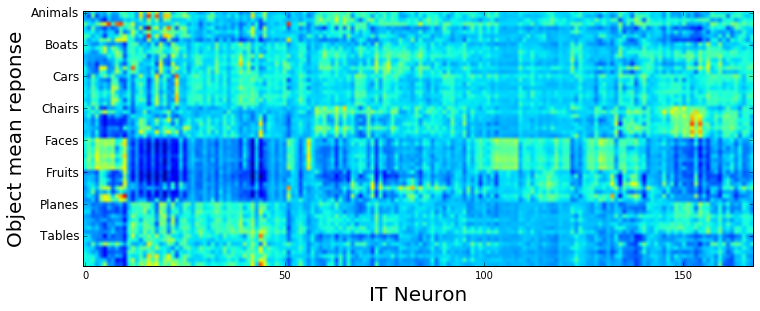

In [61]:
IT_object_means_by_category = np.row_stack([[IT_Neural_Data[objects == o].mean(0) for o in objects_by_category[c]]
                                                                for c in unique_categories])
IT_object_means_by_category.shape

plt.figure(figsize=(12, 5))
plt.imshow(IT_object_means_by_category)
plt.xlabel('IT Neuron', fontsize=20)
plt.ylabel('Object mean reponse', fontsize=20)
plt.yticks(np.arange(0, 64, 8), unique_categories, fontsize=12);

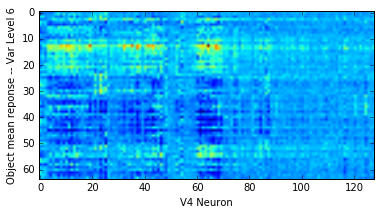

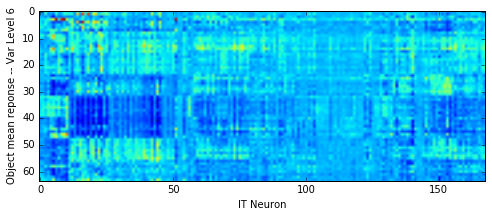

In [62]:
V4_object_means_by_category_var6 = np.row_stack([[V4_Neural_Data[(objects == o) & (var_level == 'V6')].mean(0) 
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])

IT_object_means_by_category_var6 = np.row_stack([[IT_Neural_Data[(objects == o) & (var_level == 'V6')].mean(0) 
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])




plt.imshow(V4_object_means_by_category_var6)
plt.xlabel('V4 Neuron')
plt.ylabel('Object mean reponse -- Var Level 6')
plt.figure(figsize=(8,5))
plt.imshow(IT_object_means_by_category_var6)
plt.xlabel('IT Neuron')
plt.ylabel('Object mean reponse -- Var Level 6')

# Simple Correlation Analysis

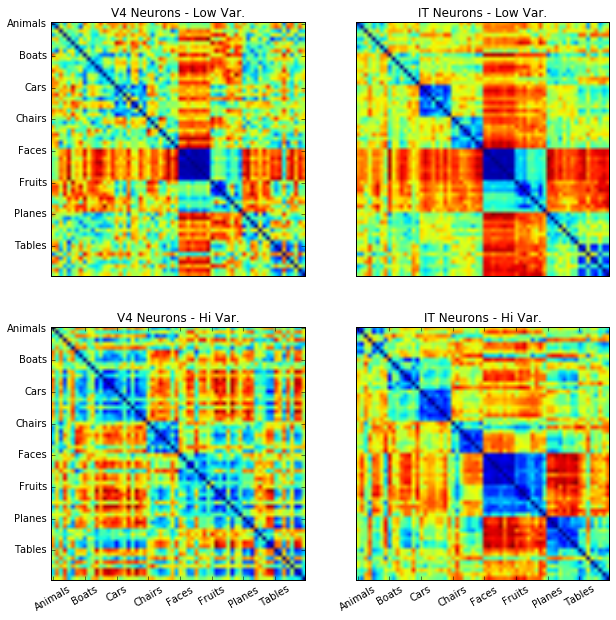

In [75]:
V4_object_means_by_category_var0 = np.row_stack([[V4_Neural_Data[(objects == o) & (var_level == 'V0')].mean(0) 
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])

IT_object_means_by_category_var0 = np.row_stack([[IT_Neural_Data[(objects == o) & (var_level == 'V0')].mean(0) 
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])


V4_rdm_var0 = 1 - np.corrcoef(V4_object_means_by_category_var0)
IT_rdm_var0  = 1 - np.corrcoef(IT_object_means_by_category_var0)

V4_rdm_var6 = 1 - np.corrcoef(V4_object_means_by_category_var6)
IT_rdm_var6  = 1 - np.corrcoef(IT_object_means_by_category_var6)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title('V4 Neurons - Low Var.')
plt.imshow(V4_rdm_var0)
plt.yticks(np.arange(0, 64, 8), unique_categories); plt.xticks([]);
plt.subplot(2, 2, 2)
plt.title('IT Neurons - Low Var.')
plt.imshow(IT_rdm_var0)
plt.gca().set_xticks([]); plt.xticks([]); plt.yticks([]); plt.xticks([]);
plt.subplot(2, 2, 3)
plt.title('V4 Neurons - Hi Var.')
plt.imshow(V4_rdm_var6)
plt.yticks(np.arange(0, 64, 8), unique_categories); 
plt.xticks(np.arange(0, 64, 8), unique_categories, rotation=30);
plt.subplot(2, 2, 4)
plt.title('IT Neurons - Hi Var.')
plt.imshow(IT_rdm_var6)
plt.xticks(np.arange(0, 64, 8), unique_categories, rotation=30); plt.yticks([]);

In [70]:
#We'd like a control.   What about the images themselves?  After all, the 
#images are like a 256x256 = 65,536 dimensional representation. 

image_object_means_by_category_var0 = np.row_stack([[all_images[(objects == o) & (var_level == 'V0'), :, :].mean(0)
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])

image_object_means_by_category_var6 = np.row_stack([[all_images[(objects == o) & (var_level == 'V6'), :, :].mean(0)
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])

#see, these are arrays of shape (num_objects, height, width)
image_object_means_by_category_var6.shape

(64, 256, 256)

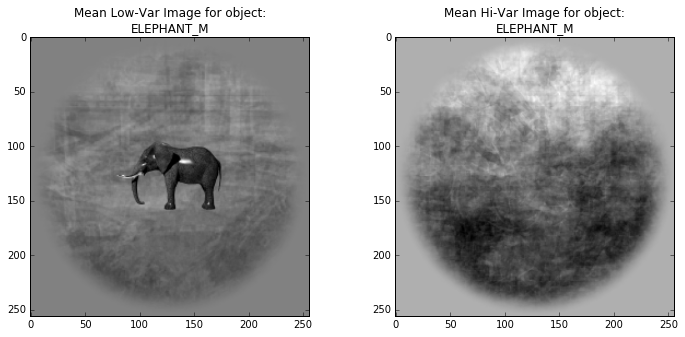

In [71]:
#just out of curiousity what do the mean images look like? 
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_object_means_by_category_var0[0], cmap='gray')
plt.title('Mean Low-Var Image for object:\n%s' % objects_by_category['Animals'][0])

plt.subplot(1, 2, 2)
plt.imshow(image_object_means_by_category_var6[0], cmap='gray')
plt.title('Mean Hi-Var Image for object:\n%s' % objects_by_category['Animals'][0])

#so basically the pixel representation completely loses the object, on average, at high variation

In [72]:
#Gotta flatten out the two height width dimensions into 1:
image_object_means_by_category_var0_flat = image_object_means_by_category_var0.reshape((64, 256**2))
image_object_means_by_category_var6_flat = image_object_means_by_category_var6.reshape((64, 256**2))

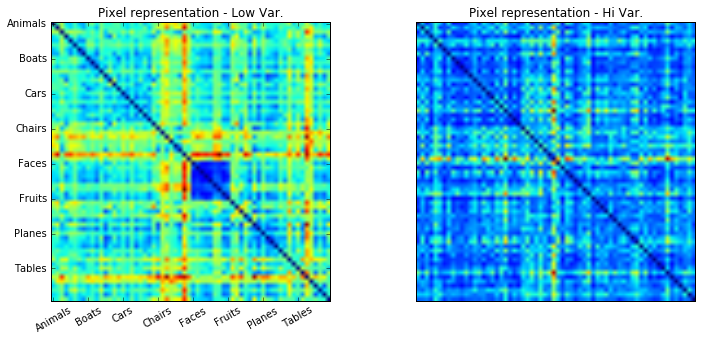

In [73]:
pixels_rdm_var0 = 1 - np.corrcoef(image_object_means_by_category_var0_flat)
pixels_rdm_var6 = 1 - np.corrcoef(image_object_means_by_category_var6_flat)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Pixel representation - Low Var.')
plt.imshow(pixels_rdm_var0)
plt.yticks(np.arange(0, 64, 8), unique_categories); 
plt.xticks(np.arange(0, 64, 8), unique_categories, rotation=30);

plt.subplot(1, 2, 2)
plt.title('Pixel representation - Hi Var.')
plt.imshow(pixels_rdm_var6)
plt.yticks([]); 
plt.xticks([]);

#interesting -- at low variation there is some structure -- especially, the faces stand out
#but at high variation basically everything is mush

### Bonus:  Looking at the representation on a per-animal basis

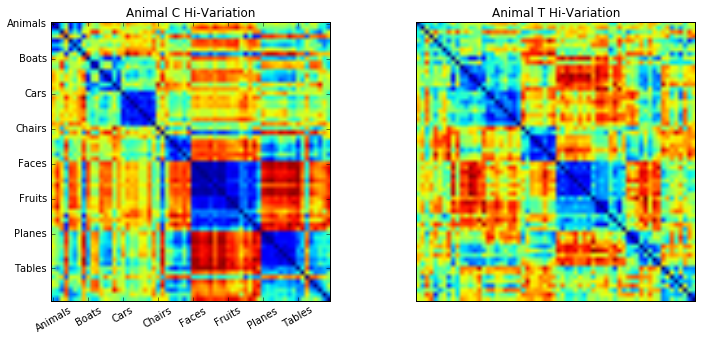

In [401]:
chabo = Ventral_Dataset['neural_meta']['ANIMAL_INFO'][:] == 'Chabo'
chabo_IT_NEURONS = IT_NEURONS[chabo[IT_NEURONS]]
chabo_IT_Neural_Data = Neural_Data[:, chabo_IT_NEURONS]

chabo_IT_object_means_by_category_var6 = np.row_stack([[chabo_IT_Neural_Data[(objects == o) & (var_level == 'V6')].mean(0) 
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])

tito = Ventral_Dataset['neural_meta']['ANIMAL_INFO'][:] == 'Tito'
tito_IT_NEURONS = IT_NEURONS[tito[IT_NEURONS]]
tito_IT_Neural_Data = Neural_Data[:, tito_IT_NEURONS]

tito_IT_object_means_by_category_var6 = np.row_stack([[tito_IT_Neural_Data[(objects == o) & (var_level == 'V6')].mean(0) 
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])

chabo_IT_rdm_var6  = 1 - np.corrcoef(chabo_IT_object_means_by_category_var6)
tito_IT_rdm_var6  = 1 - np.corrcoef(tito_IT_object_means_by_category_var6)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(chabo_IT_rdm_var6)
plt.title('Animal C Hi-Variation')
plt.yticks(np.arange(0, 64, 8), unique_categories); 
plt.xticks(np.arange(0, 64, 8), unique_categories, rotation=30);

plt.subplot(1, 2, 2)
plt.imshow(tito_IT_rdm_var6)
plt.title('Animal T Hi-Variation')
plt.yticks([]); plt.xticks([]); 

#similar between, but some notable differences -- Animal T seems "weaker" than Animal C!

# Self Regulation Ontology Datset

In [ ]:
"""
ran 

   git clone https://github.com/IanEisenberg/Self_Regulation_Ontology
   
in the /mnt/data3/yamins directory
"""

In [6]:
ls /mnt/data3/yamins

after_vhacd.tar  barrel/  Self_Regulation_Ontology/  visual/
auditory/        retina/  skdata_home/


In [7]:
ls /mnt/data3/yamins/Self_Regulation_Ontology/  

annotations/            Makefile
batch_files/            misc_scripts/
cross_decomposition/    ontology_mapping/
Data/                   pilot_expanalysis_scripts/
data_preparation/       prediction_analyses/
demographic_analyses/   README.md
dimensional_structure/  references/
discovery_analyses/     replication/
docker2singularity.sh   requirements1.txt
Dockerfile              requirements2.txt
docs/                   Results/
environment.yml         retest_analyses/
experiment_notes.txt    selfregulation/
graph_analysis/         Self_Regulation_Settings_example.txt
individual_structure/   setup.py
item_selection/         survey_items_analyses/


In [8]:
ls /mnt/data3/yamins/Self_Regulation_Ontology/Data/Complete_02-16-2019/

alcohol_drugs.csv
alcohol_drugs_ordinal.csv
demographic_health.csv
demographics.csv
demographics_ordinal.csv
DV_valence.csv
health.csv
health_ordinal.csv
Individual_Measures/
items.csv.gz
meaningful_variables_clean.csv
meaningful_variables.csv
meaningful_variables_EZ.csv
meaningful_variables_hddm.csv
meaningful_variables_imputed.csv
meaningful_variables_imputed_for_task_selection.csv
meaningful_variables_noDDM.csv
metadata/
README.txt
references/
short_DV_valence.csv
short_meaningful_variables_clean.csv
short_meaningful_variables.csv
short_meaningful_variables_EZ.csv
short_meaningful_variables_hddm.csv
short_meaningful_variables_imputed.csv
short_meaningful_variables_imputed_for_task_selection.csv
short_meaningful_variables_noDDM.csv
short_subject_x_items.csv
short_taskdata_clean.csv
short_taskdata.csv
short_taskdata_imputed.csv
short_taskdata_imputed_for_task_selection.csv
short_variables_exhaustive.csv
subject_x_items.csv
taskdata_clean.csv
taskdata.csv
taskdata_imputed.csv
taskdata_

In [9]:
cat /mnt/data3/yamins/Self_Regulation_Ontology/Data/Complete_02-16-2019/README.txt

demographics_survey.csv: demographic information from expfactory-surveys

alcohol_drug_survey.csv: alcohol, smoking, marijuana and other drugs from expfactory-surveys

ky_survey.csv: mental health and neurological/health conditions from expfactory-surveys

items.csv.gz: gzipped csv of all item information across surveys

subject_x_items.csv: reshaped items.csv such that rows are subjects and columns are individual items

Individual Measures: directory containing gzip compressed files for each individual measures

DV_valence.csv: Subjective assessment of whether each variable's 'natural' direction implies 'better' self regulation

variables_exhaustive.csv: all variables calculated for each measure

meaningful_variables_noDDM.csv: subset of exhaustive data to only meaningful variables with DDM parameters removed

meaningful_variables_EZ.csv: subset of exhaustive data to only meaningful variables with rt/acc parameters removed (replaced by EZ DDM params)

meaningful_variables_hddm.csv: su

In [11]:
sro_datadir = "/mnt/data3/yamins/Self_Regulation_Ontology/Data/Complete_02-16-2019"

In [13]:
import os

os.listdir(sro_datadir)

['short_meaningful_variables_imputed_for_task_selection.csv',
 'subject_x_items.csv',
 'README.txt',
 'meaningful_variables_noDDM.csv',
 'demographic_health.csv',
 'short_meaningful_variables.csv',
 'short_subject_x_items.csv',
 'short_meaningful_variables_noDDM.csv',
 'short_taskdata_imputed.csv',
 'short_meaningful_variables_hddm.csv',
 'meaningful_variables_imputed_for_task_selection.csv',
 'short_DV_valence.csv',
 'short_meaningful_variables_clean.csv',
 'meaningful_variables_imputed.csv',
 'taskdata_clean.csv',
 'short_taskdata.csv',
 'meaningful_variables_clean.csv',
 'meaningful_variables.csv',
 'taskdata_imputed_for_task_selection.csv',
 'meaningful_variables_EZ.csv',
 'health_ordinal.csv',
 'items.csv.gz',
 'short_variables_exhaustive.csv',
 'short_taskdata_clean.csv',
 'demographics_ordinal.csv',
 'alcohol_drugs.csv',
 'references',
 'DV_valence.csv',
 'meaningful_variables_hddm.csv',
 'health.csv',
 'demographics.csv',
 'short_meaningful_variables_imputed.csv',
 'taskdata.cs

In [16]:
individual_datadir = os.path.join(sro_datadir, 'Individual_Measures')
os.listdir(individual_datadir)

['mindful_attention_awareness_survey.csv.gz',
 'columbia_card_task_hot.csv.gz',
 'dot_pattern_expectancy.csv.gz',
 'stroop.csv.gz',
 'five_facet_mindfulness_survey.csv.gz',
 'self_regulation_survey.csv.gz',
 'future_time_perspective_survey.csv.gz',
 'digit_span.csv.gz',
 'stop_signal.csv.gz',
 'shape_matching.csv.gz',
 'probabilistic_selection.csv.gz',
 'selection_optimization_compensation_survey.csv.gz',
 'grit_scale_survey.csv.gz',
 'motor_selective_stop_signal.csv.gz',
 'go_nogo.csv.gz',
 'erq_survey.csv.gz',
 'alcohol_drugs_survey.csv.gz',
 'adaptive_n_back.csv.gz',
 'ten_item_personality_survey.csv.gz',
 'simon.csv.gz',
 'angling_risk_task_always_sunny.csv.gz',
 'directed_forgetting.csv.gz',
 'dospert_rt_survey.csv.gz',
 'simple_reaction_time.csv.gz',
 'stim_selective_stop_signal.csv.gz',
 'theories_of_willpower_survey.csv.gz',
 'bis_bas_survey.csv.gz',
 'information_sampling_task.csv.gz',
 'k6_survey.csv.gz',
 'mpq_control_survey.csv.gz',
 'two_stage_decision.csv.gz',
 'sensation

In [20]:
import pandas as pd
df  = pd.read_csv(os.path.join(individual_datadir, 'threebytwo.csv.gz'),
                  index_col=0)
df

CTI             battery_name  correct  \
threebytwo_s000_0006  100.0  Self Regulation Battery     True   
threebytwo_s000_0011  900.0  Self Regulation Battery     True   
threebytwo_s000_0016  900.0  Self Regulation Battery    False   
threebytwo_s000_0021  900.0  Self Regulation Battery    False   
threebytwo_s000_0026  900.0  Self Regulation Battery    False   
threebytwo_s000_0031  100.0  Self Regulation Battery     True   
threebytwo_s000_0036  100.0  Self Regulation Battery    False   
threebytwo_s000_0041  900.0  Self Regulation Battery     True   
threebytwo_s000_0046  100.0  Self Regulation Battery     True   
threebytwo_s000_0051  100.0  Self Regulation Battery     True   
threebytwo_s000_0056  900.0  Self Regulation Battery     True   
threebytwo_s000_0061  900.0  Self Regulation Battery     True   
threebytwo_s000_0066  100.0  Self Regulation Battery    False   
threebytwo_s000_0071  100.0  Self Regulation Battery    False   
threebytwo_s000_0076  100.0  Self Regulation Battery     True   
threebytwo_s000_0081  100.0  Self Regulation Battery     True   
threebytwo_s000_0086  100.0  Self Regulation Battery    False   
threebytwo_s000_0091  900.0  Self Regulation Battery    False   
threebytwo_s000_0096  100.0  Self Regulation Battery     True   
threebytwo_s000_0101  900.0  Self Regulation Battery     True   
threebytwo_s000_0106  900.0  Self Regulation Battery     True   
threebytwo_s000_0111  900.0  Self Regulation Battery     True   
threebytwo_s000_0116  900.0  Self Regulation Battery    False   
threebytwo_s000_0121  100.0  Self Regulation Battery    False   
threebytwo_s000_0126  100.0  Self Regulation Battery     True   
threebytwo_s000_0131  900.0  Self Regulation Battery    False   
threebytwo_s000_0136  100.0  Self Regulation Battery    False   
threebytwo_s000_0141  900.0  Self Regulation Battery    False   
threebytwo_s000_0146  900.0  Self Regulation Battery    False   
threebytwo_s000_0151  900.0  Self Regulation Battery     True   
...                     ...                      ...      ...   
threebytwo_s521_1947  100.0  Self Regulation Battery     True   
threebytwo_s521_1951  100.0  Self Regulation Battery     True   
threebytwo_s521_1955  100.0  Self Regulation Battery     True   
threebytwo_s521_1959  100.0  Self Regulation Battery     True   
threebytwo_s521_1963  900.0  Self Regulation Battery     True   
threebytwo_s521_1967  900.0  Self Regulation Battery     True   
threebytwo_s521_1971  100.0  Self Regulation Battery     True   
threebytwo_s521_1975  100.0  Self Regulation Battery     True   
threebytwo_s521_1979  900.0  Self Regulation Battery     True   
threebytwo_s521_1983  900.0  Self Regulation Battery     True   
threebytwo_s521_1987  100.0  Self Regulation Battery     True   
threebytwo_s521_1991  100.0  Self Regulation Battery     True   
threebytwo_s521_1995  100.0  Self Regulation Battery     True   
threebytwo_s521_1999  900.0  Self Regulation Battery     True   
threebytwo_s521_2003  900.0  Self Regulation Battery     True   
threebytwo_s521_2007  100.0  Self Regulation Battery     True   
threebytwo_s521_2011  100.0  Self Regulation Battery    False   
threebytwo_s521_2015  100.0  Self Regulation Battery     True   
threebytwo_s521_2019  900.0  Self Regulation Battery     True   
threebytwo_s521_2023  900.0  Self Regulation Battery     True   
threebytwo_s521_2027  100.0  Self Regulation Battery     True   
threebytwo_s521_2031  900.0  Self Regulation Battery     True   
threebytwo_s521_2035  900.0  Self Regulation Battery     True   
threebytwo_s521_2039  900.0  Self Regulation Battery     True   
threebytwo_s521_2043  900.0  Self Regulation Battery     True   
threebytwo_s521_2047  100.0  Self Regulation Battery     True   
threebytwo_s521_2051  100.0  Self Regulation Battery     True   
threebytwo_s521_2055  100.0  Self Regulation Battery     True   
threebytwo_s521_2059  900.0  Self Regulation Battery     True   
threebytwo_s521_2063  100.0  Self Regulation Battery     Tr

In [22]:
df.columns

Index([u'CTI', u'battery_name', u'correct', u'correct_response', u'cue',
       u'cue_switch', u'exp_stage', u'experiment_exp_id', u'finishtime',
       u'focus_shifts', u'full_screen', u'key_press', u'possible_responses',
       u'rt', u'stim_color', u'stim_number', u'stimulus', u'switch_type',
       u'task', u'task_switch', u'time_elapsed', u'trial_id', u'trial_num',
       u'trial_type', u'worker_id'],
      dtype='object')

In [23]:
df[['worker_id', 'rt']]

worker_id      rt
threebytwo_s000_0006      s001  1103.0
threebytwo_s000_0011      s001   441.0
threebytwo_s000_0016      s001   673.0
threebytwo_s000_0021      s001   678.0
threebytwo_s000_0026      s001   538.0
threebytwo_s000_0031      s001   772.0
threebytwo_s000_0036      s001   916.0
threebytwo_s000_0041      s001   409.0
threebytwo_s000_0046      s001   779.0
threebytwo_s000_0051      s001   627.0
threebytwo_s000_0056      s001   842.0
threebytwo_s000_0061      s001  1125.0
threebytwo_s000_0066      s001  1018.0
threebytwo_s000_0071      s001   832.0
threebytwo_s000_0076      s001   779.0
threebytwo_s000_0081      s001   765.0
threebytwo_s000_0086      s001   838.0
threebytwo_s000_0091      s001   480.0
threebytwo_s000_0096      s001   457.0
threebytwo_s000_0101      s001   464.0
threebytwo_s000_0106      s001   209.0
threebytwo_s000_0111      s001   419.0
threebytwo_s000_0116      s001   824.0
threebytwo_s000_0121      s001   816.0
threebytwo_s000_0126      s001   647.0
threebytwo_s000_0131      s001   590.0
threebytwo_s000_0136      s001   777.0
threebytwo_s000_0141      s001   566.0
threebytwo_s000_0146      s001   667.0
threebytwo_s000_0151      s001   501.0
...                        ...     ...
threebytwo_s521_1947      s560  1160.0
threebytwo_s521_1951      s560   810.0
threebytwo_s521_1955      s560   932.0
threebytwo_s521_1959      s560   874.0
threebytwo_s521_1963      s560   819.0
threebytwo_s521_1967      s560   779.0
threebytwo_s521_1971      s560  1594.0
threebytwo_s521_1975      s560   865.0
threebytwo_s521_1979      s560   755.0
threebytwo_s521_1983      s560   903.0
threebytwo_s521_1987      s560   773.0
threebytwo_s521_1991      s560   695.0
threebytwo_s521_1995      s560   890.0
threebytwo_s521_1999      s560   538.0
threebytwo_s521_2003      s560  1035.0
threebytwo_s521_2007      s560   792.0
threebytwo_s521_2011      s560  1060.0
threebytwo_s521_2015      s560  1308.0
threebytwo_s521_2019      s560   552.0
threebytwo_s521_2023      s560  1185.0
threebytwo_s521_2027      s560  1219.0
threebytwo_s521_2031      s560   907.0
threebytwo_s521_2035      s560  1093.0
threebytwo_s521_2039      s560   604.0
threebytwo_s521_2043      s560   659.0
threebytwo_s521_2047      s560  1085.0
threebytwo_s521_2051      s560   743.0
threebytwo_s521_2055      s560  1063.0
threebytwo_s521_2059      s560  1000.0
threebytwo_s521_2063      s560  1022.0

[261000 rows x 2 columns]

In [61]:
#create average reaction time data
avg_rts = df[['worker_id', 'rt']].groupby('worker_id').mean()

avg_rts

rt
worker_id          
s001        704.942
s002       1000.122
s003        752.958
s004        683.394
s005        727.906
s006        791.536
s007        845.298
s008        637.606
s009        691.650
s010        809.240
s011        600.882
s012        675.624
s013        660.278
s014        840.340
s015        739.868
s016        675.588
s017        773.372
s018        735.056
s019        631.812
s020        860.446
s021        829.002
s023        803.026
s025        858.128
s026        740.814
s027        812.120
s028        884.564
s029        721.502
s030        943.150
s031        688.300
s032        539.086
...             ...
s522        522.112
s523       1039.112
s524        933.914
s526        802.176
s527        653.510
s528        848.902
s529        872.284
s531        783.856
s533        790.312
s534        701.144
s535        926.586
s538        785.914
s539        608.036
s541        727.890
s542        783.052
s543        869.394
s544        847.614
s545        646.320
s546        665.422
s548        625.918
s549        617.550
s550        875.954
s551        591.622
s552        793.426
s553        630.578
s554        711.596
s556        966.342
s557        726.156
s559        794.162
s560        868.438

[522 rows x 1 columns]

In [47]:
#load health outcomes
health  = pd.read_csv(os.path.join(sro_datadir, 'health.csv'),
                  index_col=0)
health

Nervous  Hopeless  RestlessFidgety  Depressed  EverythingIsEffort  \
s001      4.0       4.0              4.0        4.0                 4.0   
s002      0.0       1.0              1.0        0.0                 1.0   
s003      1.0       2.0              1.0        0.0                 1.0   
s004      0.0       0.0              0.0        0.0                 0.0   
s005      0.0       1.0              1.0        0.0                 2.0   
s006      0.0       0.0              0.0        0.0                 0.0   
s007      2.0       0.0              0.0        2.0                 1.0   
s008      0.0       1.0              2.0        2.0                 2.0   
s009      1.0       0.0              1.0        0.0                 1.0   
s010      1.0       0.0              1.0        0.0                 1.0   
s011      0.0       0.0              0.0        0.0                 0.0   
s012      4.0       4.0              4.0        4.0                 4.0   
s013      0.0       0.0              0.0        0.0                 0.0   
s014      0.0       0.0              0.0        0.0                 0.0   
s015      0.0       0.0              0.0        0.0                 0.0   
s016      1.0       0.0              1.0        0.0                 0.0   
s017      2.0       1.0              2.0        1.0                 2.0   
s018      1.0       0.0              1.0        0.0                 1.0   
s019      1.0       0.0              0.0        0.0                 0.0   
s020      0.0       1.0              2.0        1.0                 0.0   
s021      0.0       2.0              2.0        0.0                 1.0   
s023      0.0       1.0              1.0        0.0                 1.0   
s025      2.0       3.0              1.0        2.0                 2.0   
s026      1.0       0.0              1.0        0.0                 0.0   
s027      2.0       2.0              2.0        2.0                 2.0   
s028      1.0       1.0              2.0        1.0                 1.0   
s029      1.0       0.0              1.0        1.0                 3.0   
s030      1.0       0.0              1.0        0.0                 1.0   
s031      1.0       0.0              1.0        0.0                 0.0   
s032      0.0       0.0              1.0        0.0                 1.0   
...       ...       ...              ...        ...                 ...   
s522      2.0       1.0              4.0        1.0                 3.0   
s523      0.0       1.0              2.0        1.0                 1.0   
s524      3.0       1.0              2.0        1.0                 3.0   
s526      1.0       1.0              3.0        1.0                 1.0   
s527      3.0       2.0              2.0        1.0                 2.0   
s528      1.0       0.0              1.0        0.0                 2.0   
s529      0.0       0.0              1.0        0.0                 1.0   
s531      3.0       2.0              4.0        2.0                 2.0   
s533      0.0       0.0              0.0        0.0                 0.0   
s534      0.0       0.0              1.0        0.0                 1.0   
s535      2.0       0.0              1.0        1.0                 1.0   
s538      1.0       1.0              1.0        0.0                 1.0   
s539      3.0       2.0              2.0        2.0                 2.0   
s541      1.0       0.0              1.0        0.0                 0.0   
s542      0.0       0.0              0.0        0.0                 1.0   
s543      2.0       1.0              2.0        1.0                 1.0   
s544      1.0       0.0              0.0        0.0                 0.0   
s545      1.0       0.0              1.0        0.0                 2.0   
s546      2.0       0.0              3.0        0.0                 1.0   
s548      1.0       3.0              3.0        2.0                 3.0   
s549      0.0       0.0              1.0        0.0                 0.0   
s550      1.0       0.0        

In [48]:
health.columns

Index([u'Nervous', u'Hopeless', u'RestlessFidgety', u'Depressed',
       u'EverythingIsEffort', u'Worthless', u'Last30DaysUsual',
       u'DaysLostLastMonth', u'DaysHalfLastMonth', u'DoctorVisitsLastMonth',
       u'DaysPhysicalHealthFeelings', u'PsychDiagnoses',
       u'PsychDiagnosesOther', u'NeurologicalDiagnoses',
       u'NeurologicalDiagnosesDescribe', u'DiseaseDiagnoses',
       u'DiseaseDiagnosesOther'],
      dtype='object')

In [63]:
health.index

Index([u's001', u's002', u's003', u's004', u's005', u's006', u's007', u's008',
       u's009', u's010',
       ...
       u's549', u's550', u's551', u's552', u's553', u's554', u's556', u's557',
       u's559', u's560'],
      dtype='object', length=522)

In [51]:
#join the data up (naturally uses the index column, which is subject)
joined = health.join(avg_rts)
joined

Nervous  Hopeless  RestlessFidgety  Depressed  EverythingIsEffort  \
s001      4.0       4.0              4.0        4.0                 4.0   
s002      0.0       1.0              1.0        0.0                 1.0   
s003      1.0       2.0              1.0        0.0                 1.0   
s004      0.0       0.0              0.0        0.0                 0.0   
s005      0.0       1.0              1.0        0.0                 2.0   
s006      0.0       0.0              0.0        0.0                 0.0   
s007      2.0       0.0              0.0        2.0                 1.0   
s008      0.0       1.0              2.0        2.0                 2.0   
s009      1.0       0.0              1.0        0.0                 1.0   
s010      1.0       0.0              1.0        0.0                 1.0   
s011      0.0       0.0              0.0        0.0                 0.0   
s012      4.0       4.0              4.0        4.0                 4.0   
s013      0.0       0.0              0.0        0.0                 0.0   
s014      0.0       0.0              0.0        0.0                 0.0   
s015      0.0       0.0              0.0        0.0                 0.0   
s016      1.0       0.0              1.0        0.0                 0.0   
s017      2.0       1.0              2.0        1.0                 2.0   
s018      1.0       0.0              1.0        0.0                 1.0   
s019      1.0       0.0              0.0        0.0                 0.0   
s020      0.0       1.0              2.0        1.0                 0.0   
s021      0.0       2.0              2.0        0.0                 1.0   
s023      0.0       1.0              1.0        0.0                 1.0   
s025      2.0       3.0              1.0        2.0                 2.0   
s026      1.0       0.0              1.0        0.0                 0.0   
s027      2.0       2.0              2.0        2.0                 2.0   
s028      1.0       1.0              2.0        1.0                 1.0   
s029      1.0       0.0              1.0        1.0                 3.0   
s030      1.0       0.0              1.0        0.0                 1.0   
s031      1.0       0.0              1.0        0.0                 0.0   
s032      0.0       0.0              1.0        0.0                 1.0   
...       ...       ...              ...        ...                 ...   
s522      2.0       1.0              4.0        1.0                 3.0   
s523      0.0       1.0              2.0        1.0                 1.0   
s524      3.0       1.0              2.0        1.0                 3.0   
s526      1.0       1.0              3.0        1.0                 1.0   
s527      3.0       2.0              2.0        1.0                 2.0   
s528      1.0       0.0              1.0        0.0                 2.0   
s529      0.0       0.0              1.0        0.0                 1.0   
s531      3.0       2.0              4.0        2.0                 2.0   
s533      0.0       0.0              0.0        0.0                 0.0   
s534      0.0       0.0              1.0        0.0                 1.0   
s535      2.0       0.0              1.0        1.0                 1.0   
s538      1.0       1.0              1.0        0.0                 1.0   
s539      3.0       2.0              2.0        2.0                 2.0   
s541      1.0       0.0              1.0        0.0                 0.0   
s542      0.0       0.0              0.0        0.0                 1.0   
s543      2.0       1.0              2.0        1.0                 1.0   
s544      1.0       0.0              0.0        0.0                 0.0   
s545      1.0       0.0              1.0        0.0                 2.0   
s546      2.0       0.0              3.0        0.0                 1.0   
s548      1.0       3.0              3.0        2.0                 3.0   
s549      0.0       0.0              1.0        0.0                 0.0   
s550      1.0       0.0        

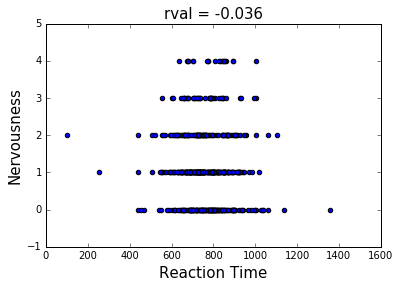

In [69]:
#let's visualize a relationship
plt.scatter(joined['rt'], joined['Nervous'])
plt.xlabel('Reaction Time', fontsize=15)
plt.ylabel('Nervousness', fontsize=15)

import scipy.stats as stats
rval = stats.pearsonr(joined['rt'], joined['Nervous'])[0]
plt.title('rval = %.3f' % rval, fontsize=15)
#not obviously related